Import section

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

Read Data

In [2]:
data = pd.read_csv("Heart_Disease_Dataset.csv")

i. Data size

In [3]:
print("Data Size : ",data.shape)

Data Size :  (1190, 12)


ii. Missing data

In [4]:
removed_data = pd.isnull(data).sum()
if(removed_data.sum() > 0):
    print('Data has removed value.')
else:
    print('Data has not removed value.')

Data has not removed value.


iii. Data is balanced or not.

In [5]:
pos = data['target'].sum()
neg = len(data['target']) - pos
print('Positive target : ',pos)
print('Negative target : ',neg)
print('Positive percent : ',pos / len(data['target']) * 100)
if(pos / len(data['target']) * 100 < 20):
    print('Not Balanced')
else:
    print('Balanced')

Positive target :  629
Negative target :  561
Positive percent :  52.85714285714286
Balanced


iv. Plot

<Axes: xlabel='target', ylabel='count'>

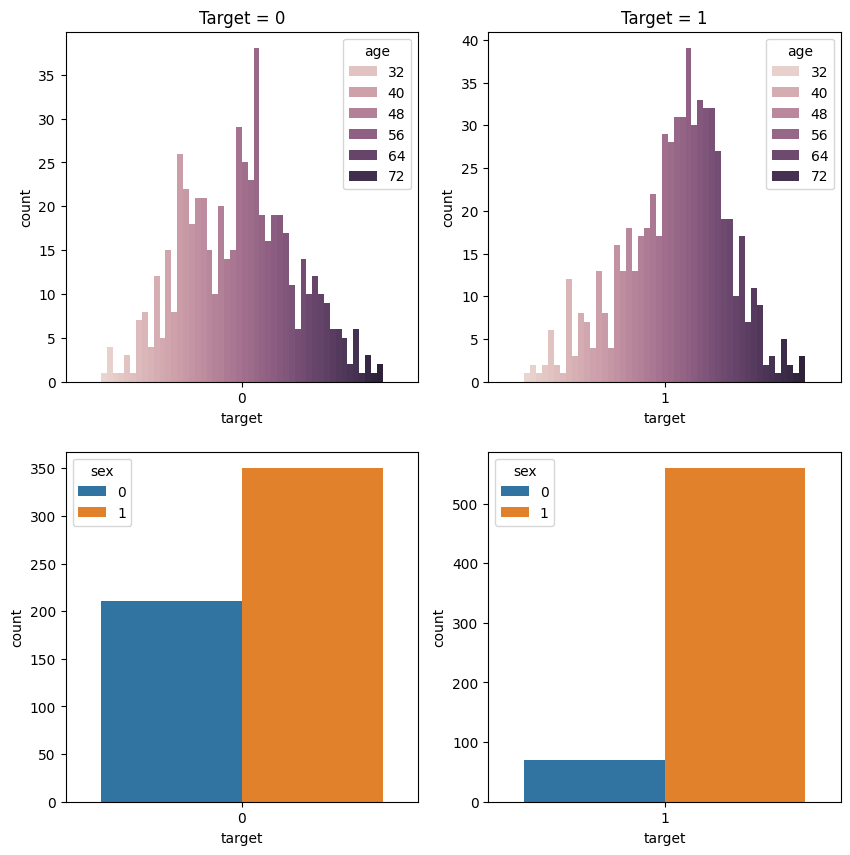

In [6]:
target_0 = data[data['target'] == 0]
target_1 = data[data['target'] == 1]
fig, axs = plt.subplots(2,2,figsize =(10,10))
sns.countplot(x="target", data=target_0,hue = 'age', ax=axs[0,0]).set_title("Target = 0")
sns.countplot(x="target", data=target_1,hue = 'age', ax=axs[0,1]).set_title("Target = 1")
sns.countplot(x="target", data=target_0,hue = 'sex', ax=axs[1,0])
sns.countplot(x="target", data=target_1,hue = 'sex', ax=axs[1,1])        

Z_Test

In [12]:
Z_test_th = 3
numerical_col = ["age","resting bp s","cholesterol","max heart rate", "oldpeak"]
indx_list = []
for i in numerical_col:
    mean = data[i].mean()
    var  = data[i].std()
    col_val  = abs((data[i] - mean) / var)
    for j in range(len(col_val)):
        if col_val[j] > 3 :
            indx_list.append(j)
data_z = data.drop(indx_list)

Normalize data

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_z_n = data_z
data_z_n[numerical_col] = scaler.fit_transform(data_z[numerical_col])

In [23]:
data_z_n.target.replace(0 , -1 , inplace = True) 
x_train = data_z_n.to_numpy()[:int(0.7*len(data_z_n)),:-1]
x_test = data_z_n.to_numpy()[len(x_train):,:-1]
y_train = data_z_n['target'].to_numpy()[:int(0.7*len(data_z_n))]
y_test = data_z_n['target'].to_numpy()[len(x_train):]

Accuracy Function

In [25]:
def accuracy(y_true, y_pred):
    
    tp_vec = y_true[(y_true == 1) & (y_pred == 1)]
    tn_vec = y_true[(y_true == -1) & (y_pred == -1)]
    fp_vec = y_true[(y_true == 1) & (y_pred == -1)]
    fn_vec = y_true[(y_true == -1) & (y_pred == 1)]
    
    TP = len(tp_vec)
    TN = len(tn_vec)
    FN = len(fp_vec)
    FP = len(fn_vec)
    
    Accuracy = (TN + TP) / (FN + FP + TN + TP) 
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)
    F1score = 2*Precision*Recall/(Precision + Recall)

    return Accuracy, Precision, Recall, F1score

SVM Linear Kernel

In [26]:
svm1   = SVC(kernel='linear',C = 1)
svm1.fit(x_train,y_train)
y_pred = svm1.predict(x_test)
print("SVM linear kernel:", accuracy(y_test, y_pred))

SVM linear kernel: (0.7879656160458453, 0.7733333333333333, 0.7435897435897436, 0.7581699346405228)


SVM Polynomial Kernel

In [27]:
svm2   = SVC(kernel='poly', degree = 20)
svm2.fit(x_train,y_train)
y_pred = svm2.predict(x_test)
print("SVM polynomial kernel:", accuracy(y_test, y_pred))

SVM polynomial kernel: (0.8595988538681948, 0.8848920863309353, 0.7884615384615384, 0.8338983050847457)


SVM RBF Kernel

In [28]:
svm3   = SVC(kernel='rbf', gamma = 15,C=4)
svm3.fit(x_train,y_train)
y_pred = svm3.predict(x_test)
print("SVM RBF kernel:", accuracy(y_test, y_pred))

SVM RBF kernel: (0.9169054441260746, 0.8895705521472392, 0.9294871794871795, 0.9090909090909092)
